In [381]:
import pandas as pd
from ipywidgets import widgets
import matplotlib.pyplot as plt

%matplotlib inline

In [382]:
df_prices = pd.read_csv("taxes.csv")
df_prices.set_index("Tariff")
df_prices

,Tariff,Price
0,Vodafone,0.30
1,Kyivstar,0.25
2,Lifecell,0.18
3,Stationary,0.50


In [383]:
df_st = pd.read_csv("staff.csv")
df_st = pd.DataFrame(df_st)
df_st

,Surname,Position
0,Kravets,operator
1,Sirak,assistant
2,Konanets,director
3,Kobyk,operator


In [384]:
df_cal1 = pd.read_csv("calls_1.csv")
df_cal1 = pd.DataFrame(df_cal1)
df_cal1

,Surname,Tariff,Duration
0,Konanets,Kyivstar,5
1,Sirak,Lifecell,4
2,Kravets,Vodafone,9
3,Kobyk,Stationary,7


In [385]:
df_cal2 = pd.read_csv("calls_2.csv")
df_cal2 = pd.DataFrame(df_cal2)
df_cal2

,Surname,Tariff,Duration
0,Kravets,Stationary,3
1,Sirak,Kyivstar,10
2,Konanets,Lifecell,7
3,Kobyk,Vodafone,12


In [386]:
df_cal3 = pd.read_csv("calls_3.csv")
df_cal3 = pd.DataFrame(df_cal3)
df_cal3

,Surname,Tariff,Duration
0,Kravets,Lifecell,15
1,Sirak,Vodafone,7
2,Konanets,Stationary,13
3,Kobyk,Kyivstar,4


In [498]:
df_calls = pd.concat(map(pd.read_csv, ['calls_1.csv', 'calls_2.csv','calls_3.csv']))
df_calls.set_index("Surname")
df_calls

,Surname,Tariff,Duration
0,Konanets,Kyivstar,5
1,Sirak,Lifecell,4
2,Kravets,Vodafone,9
3,Kobyk,Stationary,7
0,Kravets,Stationary,3
1,Sirak,Kyivstar,10
2,Konanets,Lifecell,7
3,Kobyk,Vodafone,12
0,Kravets,Lifecell,15
1,Sirak,Vodafone,7


In [499]:
def get_sum(index, table):
    for i in range(len(table)):
        if table.iloc[i, 0] == index:
            return table.iloc[i, 1]
df_calls["Sum"] = df_calls.apply(lambda x: x.Duration * get_sum(x.Tariff, df_prices), axis = 1)
df_calls.set_index("Tariff")

,Surname,Duration,Sum
Tariff,,,
Kyivstar,Konanets,5,1.25
Lifecell,Sirak,4,0.72
Vodafone,Kravets,9,2.70
Stationary,Kobyk,7,3.50
Stationary,Kravets,3,1.50
Kyivstar,Sirak,10,2.50
Lifecell,Konanets,7,1.26
Vodafone,Kobyk,12,3.60
Lifecell,Kravets,15,2.70


In [500]:
df_calls = df_calls.merge(df_st)
df_calls

,Surname,Tariff,Duration,Sum,Position
0,Konanets,Kyivstar,5,1.25,director
1,Konanets,Lifecell,7,1.26,director
2,Konanets,Stationary,13,6.50,director
3,Sirak,Lifecell,4,0.72,assistant
4,Sirak,Kyivstar,10,2.50,assistant
5,Sirak,Vodafone,7,2.10,assistant
6,Kravets,Vodafone,9,2.70,operator
7,Kravets,Stationary,3,1.50,operator
8,Kravets,Lifecell,15,2.70,operator
9,Kobyk,Stationary,7,3.50,operator


In [453]:
s = df_calls.groupby('Position')['Sum'].sum().reset_index(name='Sum of calls')
s

,Position,Sum of calls
0,assistant,5.32
1,director,9.01
2,operator,15.00


In [456]:
def drop_down_list(position):
    if position == 'assistant':
        print(s.iloc[0:1])
    elif position == 'director':
        print(s.iloc[1:2])
    elif position == 'operator':
        print(s.iloc[2:3])
    else:
        print('error!')

In [455]:
w = widgets.interactive(drop_down_list, position=['assistant', 'director', 'operator'])
w

interactive(children=(Dropdown(description='position', options=('assistant', 'director', 'operator'), value='a…

In [391]:
total_talk = df_calls.groupby('Tariff')['Duration'].sum().reset_index(name='Duration')
total_talk

,Tariff,Duration
0,Kyivstar,19
1,Lifecell,26
2,Stationary,23
3,Vodafone,28


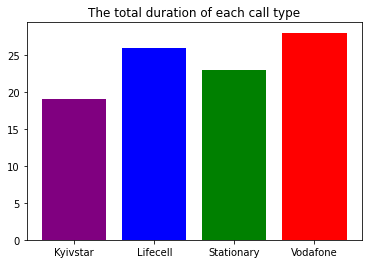

In [433]:
def histogram():
    fig, ax = plt.subplots()
    ax.bar(total_talk['Tariff'][-4:], total_talk['Duration'][-4:], color=['purple', 'blue', 'green', 'red'])
    ax.set_title("The total duration of each call type")
    plt.xticks(rotation=360)
    plt.show()
    
histogram()

In [495]:
sort_all_talk = df_calls.groupby('Surname')['Duration'].sum().reset_index(name='Duration')
sort_all_talk = sort_all_talk.sort_values(by=['Duration'])[-4:]
print("The most talkative:")
sort_all_talk.tail(1)


The most talkative:


,Surname,Duration
2,Kravets,27
